In [1]:
dataset = 'kaggle.com/datasets/kumarajarshi/life-expectancy-who'

In [2]:
data_dir = './life-expectancy-who'

import os
os.listdir(data_dir)
!pip install skillsnetwork[regular]
from tqdm import tqdm
!pip install opendatasets --upgrade
import opendatasets as od
od.download(dataset)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

Skipping, found downloaded files in "./life-expectancy-who" (use force=True to force download)


In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1668,Mauritius,2014,Developing,74.2,148.0,0,0.01,115.278428,97.0,0,...,98.0,4.81,97.0,0.1,1153.938220,126934.0,7.0,6.9,0.769,14.7
140,Austria,2003,Developed,78.8,88.0,0,12.20,504.430874,83.0,90,...,84.0,1.48,84.0,0.1,3212.935500,8121423.0,1.7,1.9,0.837,14.7
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,NaN,0,...,NaN,3.75,NaN,0.1,56.424987,892531.0,12.1,12.2,0.470,9.8
1171,Iceland,2014,Developed,82.5,49.0,0,7.45,8254.020763,NaN,0,...,9.0,8.86,9.0,0.1,52473.113560,327386.0,1.0,0.9,0.915,19.0
1527,Lithuania,2010,Developed,72.4,188.0,0,12.90,1423.802386,94.0,2,...,95.0,7.90,95.0,0.1,11984.868570,397282.0,2.8,2.8,0.824,16.8


In [4]:
data.rename(columns={data.columns[3]:'Life expectancy',
                     data.columns[4]:'Adult mortality',
                     data.columns[5]:'Infant deaths',
                     data.columns[7]:'Health expenditure',
                     data.columns[9]:'Measles',
                     data.columns[10]:'BMI',
                     data.columns[11]:'Under-5 deaths',
                     data.columns[14]:'Diphtheria',
                     data.columns[15]:'HIV/AIDS',
                     data.columns[18]:'Thinness (1-19 years)',
                     data.columns[19]:'Thinness (5-9 years)'},
                    inplace=True)

data = data.drop('Country',axis=1)
first = data.pop('Status')
data.insert(len(data.columns),'Status',first)

null_count = data.isnull().sum()
print(null_count[null_count>0].sort_values(ascending=False),
      'Number of null entries:',null_count.sum())

for column in data:
    if data[column].isnull().sum() > 0:
        median = data[column].median()
        data[column].fillna(median,inplace=True)
null_count = data.isnull().sum()

print('Number of duplicated rows:',data.duplicated().sum())

data.sample(5)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
BMI                                 34
Thinness (1-19 years)               34
Thinness (5-9 years)                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult mortality                     10
dtype: int64 Number of null entries: 2563
Number of null entries after replacement: 0
Number of duplicated rows: 0


,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Health expenditure,Hepatitis B,Measles,BMI,Under-5 deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income composition of resources,Schooling,Status
2336,2008,74.7,136.0,0,11.37,0.000000,99.0,0,54.8,0,...,8.20,99.0,0.1,1766.947595,1386542.0,1.3,1.4,0.813,14.8,Developed
2152,2014,65.7,23.0,12,0.01,7.549797,98.0,10,2.8,16,...,7.53,98.0,0.4,76.569952,11345357.0,5.8,5.8,0.488,10.8,Developing
609,2014,64.2,275.0,7,0.01,0.000000,9.0,71,26.8,10,...,5.15,9.0,3.0,1766.947595,1386542.0,7.6,7.3,0.581,11.1,Developing
2706,2006,63.7,245.0,6,2.71,29.272354,98.0,48,41.3,8,...,2.90,98.0,0.1,2136.668150,48115.0,3.3,3.3,0.000,10.4,Developing
1862,2014,74.5,148.0,2,3.55,473.123812,98.0,0,53.2,3,...,9.40,98.0,0.1,1975.464770,613997.0,1.8,1.7,0.636,11.6,Developing


In [5]:
x_cols = data.columns[:-1]
x_data = data[x_cols]
y_col = 'Status'
y_data = data[y_col]

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=42)

print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

2203 train samples
735 test samples


In [6]:
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
x_poly = poly.transform(x_data)

print(x_train_poly.shape)
print(x_test_poly.shape)

(2203, 230)
(735, 230)


In [7]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_train_s = pd.DataFrame(x_train,columns=x_data.columns)
x_test = ss.transform(x_test)
x_test_s = pd.DataFrame(x_test,columns=x_data.columns)

x_train_s.sample(5)

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Health expenditure,Hepatitis B,Measles,BMI,Under-5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income composition of resources,Schooling
81,0.965236,0.520068,-0.652661,-0.249395,-1.159430,1.141498,0.650995,-0.196139,1.545538,-0.255993,0.653568,-1.392462,0.654826,-0.320205,3.373452,-0.166945,-0.319744,-0.346907,0.794587,0.353754
725,-1.648941,-1.193902,1.778074,-0.032655,0.528733,-0.361837,0.387664,1.352910,-1.284143,0.006885,-0.507535,-0.389648,-3.132142,0.664575,-0.481608,-0.194647,0.962393,0.908991,-1.816788,-2.342961
1882,1.618780,0.888099,-0.733149,-0.258426,0.014611,-0.180679,0.694883,-0.198420,0.971617,-0.262565,0.696572,0.034780,0.696904,-0.320205,-0.193717,-0.194198,-0.823441,-0.795443,0.635720,0.663721
620,-0.777549,0.562129,-1.224125,-0.159087,0.789632,0.000026,-0.095108,-0.198420,0.886776,-0.183702,0.352541,0.384308,0.654826,-0.320205,-0.171297,0.582621,-0.846337,-0.862723,0.700260,1.314652
705,-0.559701,-1.509357,1.544659,-0.122963,-0.870396,-0.348108,0.387664,-0.195210,-0.979715,-0.117982,-3.216775,-0.310588,-0.018412,0.625956,-0.463801,-0.080697,0.825021,0.774431,-0.987701,-0.607145


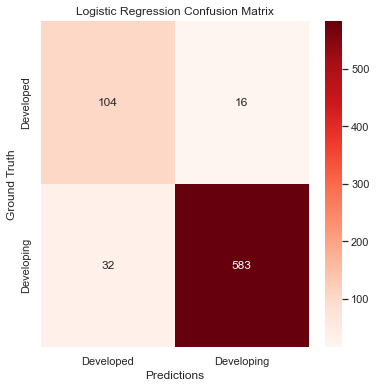

In [8]:
# (UNREGULARISED) LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(x_train_s,y_train)
y_pred_lr = lr.predict(x_test_s)
cm_lr = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Reds', 
            xticklabels=['Developed','Developing'], 
            yticklabels=['Developed','Developing'])
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

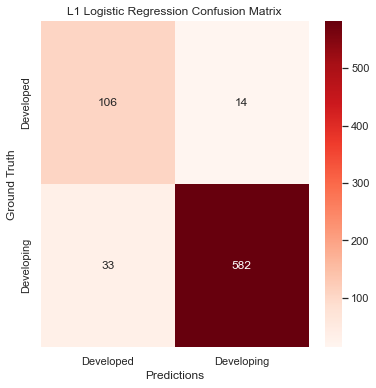

In [9]:
# L1-REGULARISED LOGISTIC REGRESSION
lr_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
lr_l1.fit(x_train_s,y_train)
y_pred_lr_l1 = lr_l1.predict(x_test_s)
cm_lr = confusion_matrix(y_test,y_pred_lr_l1)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Reds', 
            xticklabels=['Developed','Developing'], 
            yticklabels=['Developed','Developing'])
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('L1 Logistic Regression Confusion Matrix')

plt.show()

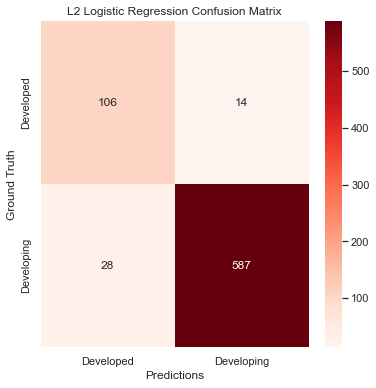

In [10]:
# L2-REGULARISED LOGISTIC REGRESSION
lr_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear')
lr_l2.fit(x_train_s,y_train)
y_pred_lr_l2 = lr_l2.predict(x_test_s)
cm_lr = confusion_matrix(y_test,y_pred_lr_l2)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Reds', 
            xticklabels=['Developed','Developing'], 
            yticklabels=['Developed','Developing'])
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('L2 Logistic Regression Confusion Matrix')

plt.show()

In [11]:
coef = lr.coef_
coef_df = pd.DataFrame({'Feature':x_train_s.columns,'Coefficient':coef[0]}).sort_values(by='Coefficient',ascending=False)

display(coef_df)

,Feature,Coefficient
16,Thinness (1-19 years),1.466232
15,Population,0.595852
2,Adult mortality,0.590236
13,HIV/AIDS,0.562609
0,Year,0.382166
5,Health expenditure,0.291016
3,Infant deaths,0.273191
17,Thinness (5-9 years),0.269174
19,Schooling,0.234137
9,Under-5 deaths,0.175399


In [20]:
coef[0]

array([ 0.38216596, -1.09048826,  0.59023646,  0.27319144, -1.30861403,
        0.29101586, -0.57953362,  0.0567479 , -0.05344918,  0.17539916,
       -0.10989569, -0.11498591, -0.16338957,  0.56260923, -0.28606296,
        0.59585203,  1.46623151,  0.26917377, -2.40583578,  0.23413677])

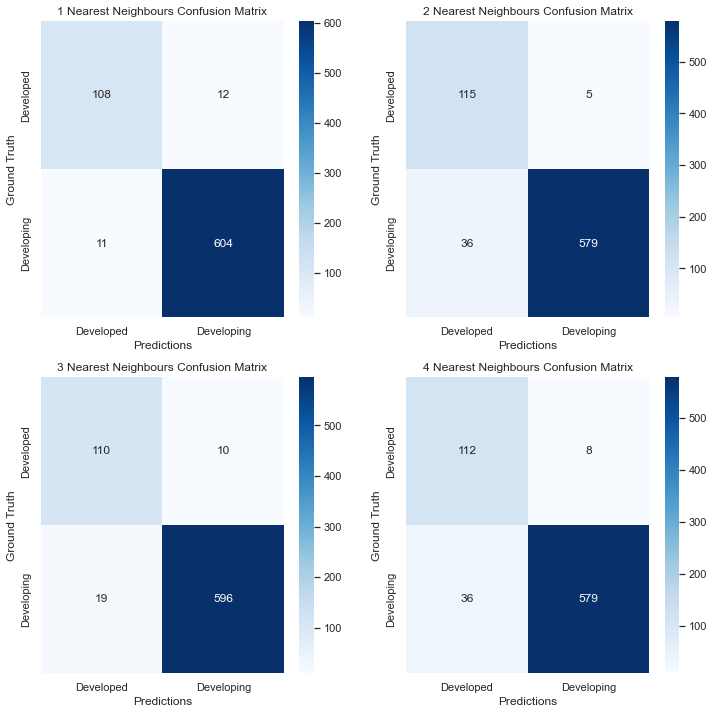

In [12]:
# K-NEAREST NEIGHBOURS
neighbors = [1,2,3,4]
errors = []
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i, neighbor in enumerate(neighbors):
    row = i // 2
    col = i % 2
    knc = KNeighborsClassifier(n_neighbors=neighbor)
    knc.fit(x_train,y_train)
    y_pred_knc = knc.predict(x_test)   
    cm_knc = confusion_matrix(y_test,y_pred_knc)
    sns.heatmap(cm_knc, annot=True,fmt='d',cmap='Blues',ax=ax[row,col], 
                xticklabels=['Developed','Developing'], 
                yticklabels=['Developed','Developing'])
    ax[row,col].set_title(f'{neighbor} Nearest Neighbours Confusion Matrix')
    ax[row,col].set_xlabel('Predictions')
    ax[row,col].set_ylabel('Ground Truth')

plt.show()

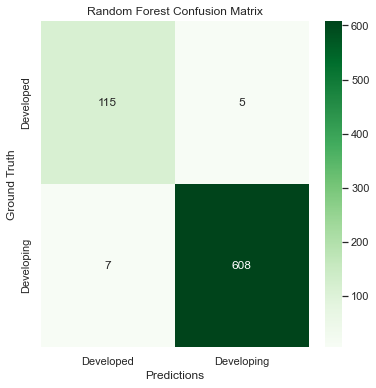

In [13]:
# RANDOM FOREST
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(6,6))
sns.heatmap(cm_rfc, annot=True,fmt='d',cmap='Greens', 
            xticklabels=['Developed','Developing'], 
            yticklabels=['Developed','Developing'])
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('Random Forest Confusion Matrix')

plt.show()

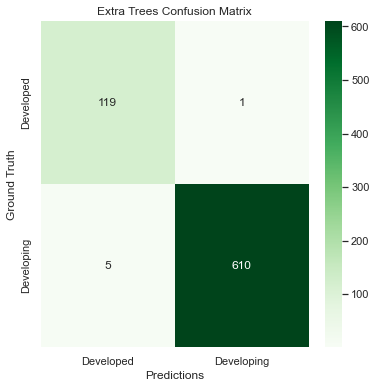

In [14]:
# EXTRA TREES
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred_etc = etc.predict(x_test)
cm_etc = confusion_matrix(y_test,y_pred_etc)
plt.figure(figsize=(6,6))
sns.heatmap(cm_etc,annot=True,fmt='d',cmap='Greens', 
            xticklabels=['Developed','Developing'], 
            yticklabels=['Developed','Developing'])
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('Extra Trees Confusion Matrix')

plt.show()

In [15]:
fi = rfc.feature_importances_
fi_df = pd.DataFrame({'Feature':x_train_s.columns,'Importance':fi}).sort_values(by='Importance',ascending=False)

display(fi_df)

,Feature,Importance
4,Alcohol,0.174075
18,Income composition of resources,0.173884
1,Life expectancy,0.114487
17,Thinness (5-9 years),0.084815
16,Thinness (1-19 years),0.072350
19,Schooling,0.066016
8,BMI,0.035122
2,Adult mortality,0.035008
5,Health expenditure,0.027983
14,GDP,0.027175


In [16]:
target_names = ['developed','developing']
print(classification_report(y_test,y_pred_etc,target_names=target_names))

              precision    recall  f1-score   support

   developed       0.96      0.99      0.98       120
  developing       1.00      0.99      1.00       615

    accuracy                           0.99       735
   macro avg       0.98      0.99      0.99       735
weighted avg       0.99      0.99      0.99       735

